# 4ª Lista de Exercícios de Otimização Natural

### Vinicius Mesquita de Pinho, Otimização Natural, Lista 4

### Comentários gerais:
Esta liga contém a seguinte estrutura: temos a definição dos pacotes utilizados, seguidos das questões. Cada questão começa com a definição das funções utilizadas, seguida da execução do algoritmo com seus parâmetros.

#### 1ª Questão
A primeira questão conseguiu chegar ao mínimo global sem problemas, mesmo utilizando as estratégias mais simples para o GA.
#### 2ª Questão
Diferente da primeira, os parâmetros eram definidos pelo enunciado e não é possível chegar ao máximo da função dada sempre. Caso o número de gerações seja aumentado (e.g., 1000 gerações) é possível obtermos o máximo sempre.
#### 3ª Questão
Nesta questão não foi possível obtermos o mínimo global com os parâmetros do enunciado. Um tunning melhor é preciso.

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    'paper',
    'white',
    'colorblind',
    font_scale=2.2,
    rc={
        'lines.linewidth': 2,
        'text.usetex': True,
        'figure.figsize': (8.0, 6.0),
        'image.interpolation': 'nearest',
        'image.cmap': 'gray'
    },
)

# 1ª Questão

Escreva um algoritmo genético simples (SAG) para minimizar a função $y(x) = x^2 - 0.3cos(10\pi x)$ no intervalo $x \in [-2, +2]$, utilizando um genótipo de representação binária com pelo $16$ bits. Utilizando inicialização aleatória, execute cinco vezes o algoritmo. Comente sobre os resultados obtidos.

In [37]:
def funcao_a_minimizar(x):
    return x**2 - 0.3*np.cos(10*np.pi*x)

def init_indv_rand(num_bits):
    return [int(bool(b)) for b in np.random.randint(2, size=num_bits)]

def eval_pop_rand(num_indv, num_bits):
    return np.array(list(map(lambda i: init_indv_rand(num_bits),range(num_indv))))

def bin_from_gray(g):
    b = [g[-1]]
    for n in g[-2::-1]:
        b.insert(0, b[0]^n)
    return b
    
def eval_fenotipo(cromossomo, num_bits):
    b = bin_from_gray(cromossomo)
    u = sum(2**k for k in range(num_bits) if b[k])
    u /= 2**num_bits
    return -2 + 4 * u   

def eval_fitness(populacao):
    return list(map(lambda i: funcao_a_minimizar(eval_fenotipo(list(populacao[i,:]),len(populacao[0]))),range(len(populacao))))

def parent_selection(populacao, fitness, num_parents):
    fitness = 100 - np.array(fitness)
    pre_a = (fitness/sum(fitness))
    a = np.cumsum(pre_a)
    mating_pool = []
    current_member = 1
    ue = 1
    r = np.random.uniform(0,1/num_parents)
    while (current_member <= num_parents):
        while (r <= a[ue]):
            mating_pool.append(populacao[ue].tolist())
            r = r + 1/num_parents
            current_member = current_member + 1
        ue = ue + 1
    return np.array(mating_pool)

def binary_mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.uniform(0,1) < mutation_rate:
            chromosome[i] = int(not(chromosome[i]))
    return np.array(chromosome)

def eval_bin_mutation(mating_pool, mutation_rate):
    return np.array(list(map(lambda i: binary_mutation(mating_pool[i],mutation_rate),range(len(mating_pool)))))

def one_pt_crossover(parents, crossover_rate):
    i, j = np.random.choice(range(len(parents)),2)
    if np.random.uniform(0,1) < crossover_rate:
        xchg_pt = np.random.choice(range(len(parents[0])))
        child_a = np.hstack((parents[i][:xchg_pt],parents[j][xchg_pt:]))
        child_b = np.hstack((parents[j][:xchg_pt],parents[i][xchg_pt:]))
    else:
        child_a = parents[i]
        child_b = parents[j]
    return np.array((child_a, child_b))

def eval_onept_crossover(parents, crossover_rate, num_crossover):
    return np.concatenate(list(map(lambda i: one_pt_crossover(parents, crossover_rate),range(num_crossover))))
    

In [38]:
num_bits = 16
num_indv = 100
num_parents = 50
mutation_rate = 0.2
crossover_rate = 0.7
num_crossover = int(num_indv/2)
num_geracoes = 1000

populacao = eval_pop_rand(num_indv, num_bits)
pop_fitness = eval_fitness(populacao)
best_x = min(pop_fitness)
geracao = 0
for n in range(num_geracoes):
    mating_pool = parent_selection(populacao, pop_fitness, num_parents)
    parents_xover = eval_onept_crossover(mating_pool, crossover_rate, num_crossover)
    offspring = eval_bin_mutation(parents_xover, mutation_rate)
    offspring_fitness = eval_fitness(offspring)
    if (min(offspring_fitness) < best_x):
        best_x = min(offspring_fitness)
        geracao = n
    populacao = offspring
    pop_fitness = eval_fitness(populacao)
print(f'O mínimo {best_x:.5} foi encontrado na geração de número {geracao + 1}.')   

O mínimo -0.3 foi encontrado na geração de número 771.


#### Comentário:
Mesmo utilizando a selação de pais por meio do SUS, a operação de crosssover simples num único ponto, a mutação com \textit{flip bit} e todos os filhos sendo selecionados para a próxima fase, conseguiu-se chegar ao mínimo global da função proposta.

# 2ª Questão

### Questão 7 do Capítulo 3

In [10]:
def init_indv_rand(num_bits):
    return [int(bool(b)) for b in np.random.randint(2, size=num_bits)]

def eval_pop_rand(num_indv, num_bits):
    return np.array(list(map(lambda i: init_indv_rand(num_bits),range(num_indv))))

def eval_fenotipo(cromossomo, num_bits):
    return sum(cromossomo)

def eval_fitness(populacao):
    return list(map(lambda i: (eval_fenotipo(list(populacao[i,:]),len(populacao[0]))),range(len(populacao))))

def parent_selection(populacao, fitness, num_parents):
    fitness = np.array(fitness)
    pre_a = (fitness/sum(fitness))
    a = np.cumsum(pre_a)
    mating_pool = []
    current_member = 1
    ue = 1
    r = np.random.uniform(0,1/num_parents)
    while (current_member <= num_parents):
        while (r <= a[ue]):
            mating_pool.append(populacao[ue].tolist())
            r = r + 1/num_parents
            current_member = current_member + 1
        ue = ue + 1
    return np.array(mating_pool)

def binary_mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.uniform(0,1) < mutation_rate:
            chromosome[i] = int(not(chromosome[i]))
    return np.array(chromosome)

def eval_bin_mutation(mating_pool, mutation_rate):
    return np.array(list(map(lambda i: binary_mutation(mating_pool[i],mutation_rate),range(len(mating_pool)))))

def one_pt_crossover(parents, crossover_rate):
    i, j = np.random.choice(range(len(parents)),2)
    if np.random.uniform(0,1) < crossover_rate:
        xchg_pt = np.random.choice(range(len(parents[0])))
        child_a = np.hstack((parents[i][:xchg_pt],parents[j][xchg_pt:]))
        child_b = np.hstack((parents[j][:xchg_pt],parents[i][xchg_pt:]))
    else:
        child_a = parents[i]
        child_b = parents[j]
    return np.array((child_a, child_b))

def eval_onept_crossover(parents, crossover_rate, num_crossover):
    return np.concatenate(list(map(lambda i: one_pt_crossover(parents, crossover_rate),range(num_crossover))))   

O máximo 24 foi encontrado na 68-ésima geração.


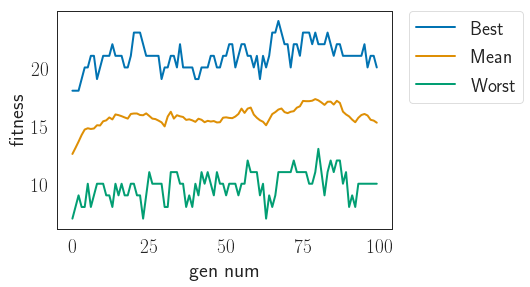

In [15]:
num_bits = 25
num_indv = 100
num_parents = 100
mutation_rate = 1/num_bits
crossover_rate = 0.7
num_crossover = int(num_indv/2)
num_geracoes = 100

populacao = eval_pop_rand(num_indv, num_bits)
pop_fitness = eval_fitness(populacao)

best_x = max(pop_fitness)
best = np.zeros((num_geracoes))
worst = np.zeros((num_geracoes))
mean = np.zeros((num_geracoes))
geracao = 0

for n in range(num_geracoes):
    mating_pool = parent_selection(populacao, pop_fitness, num_parents)
    parents_xover = eval_onept_crossover(mating_pool, crossover_rate, num_crossover)
    offspring = eval_bin_mutation(parents_xover, mutation_rate)
    offspring_fitness = eval_fitness(offspring)
    if (max(offspring_fitness) > best_x):
        best_x = max(offspring_fitness)
        geracao = n
        if best_x == num_bits: break
    populacao = offspring
    pop_fitness = offspring_fitness
    best[n] = max(offspring_fitness)
    worst[n] = min(offspring_fitness)
    mean[n] = np.mean(offspring_fitness)
print(f'O máximo {best_x} foi encontrado na {geracao + 1}-ésima geração.')   

sns.lineplot(range(num_geracoes), best, label="Best")
sns.lineplot(range(num_geracoes), mean, label="Mean")
sns.lineplot(range(num_geracoes), worst, label="Worst")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('gen num')
plt.ylabel('fitness')
plt.savefig('all.eps',format='eps')
plt.show()

# 3ª Questão

### Questão 5 do Capítulo 4

In [11]:
def ackley_func(x):
    n = len(x)
    return -20*np.exp(-0.2*np.sqrt(1/n * np.sum(x**2))) - np.exp(1/n * np.sum(np.cos(2*np.pi*x))) + 20 + np.exp(1)

def init_indv_rand(num_alelo):
    return [b for b in np.random.uniform(low=-30, high=30, size=num_alelo)]

def eval_pop_rand(num_indv, num_alelo):
    return np.array(list(map(lambda i: init_indv_rand(num_alelo), range(num_indv))))

def init_sigma_rand(num_alelo):
    return [b for b in np.random.normal(loc=0.0, scale=1.0, size=num_alelo)]

def eval_sigma_rand(num_indv, num_alelo):
    return np.array(list(map(lambda i: init_sigma_rand(num_alelo), range(num_indv))))

def eval_fitness(populacao):
    return list(map(lambda i: ackley_func(populacao[i]), range(len(populacao))))

def uncorr_mut_n_stepsizes(x, sigma):
    global_uni = np.random.normal(loc=0.0, scale=1.0, size=None)
    local_uni = np.random.normal(loc=0.0, scale=1.0, size=len(sigma))
    
    tau_prime = 1/(np.sqrt(2*len(x)))
    tau = 1/(np.sqrt(2*np.sqrt(len(x))))
    
    eps = 10**-5

    sigma_new = np.multiply(sigma, np.exp(tau_prime*global_uni + tau*local_uni))
    
    for i in range(len(sigma_new)):
        if sigma_new[i] < eps: sigma_new[i] = eps

    x_new = x + np.multiply(sigma_new, local_uni)       
    return x_new, sigma_new

def eval_uncorr_mut(children, sigma_children, num_filhos):
    x = []
    sigma = []
    for i in range(num_filhos):
        x_new, sigma_new = uncorr_mut_n_stepsizes(children[i], sigma_children[i])
        x.append(x_new)
        x_new = 0
        sigma.append(sigma_new)
        sigma_new = 0
    return np.array(x), np.array(sigma)

def globl_discrete_recomb(populacao):
    indv_new = np.zeros(len(populacao[0]))
    i, j = np.random.choice(range(len(populacao[0])), 2)
    for q in range(len(populacao[0])):
        if np.random.choice((True, False)):
            indv_new[q] = populacao[i][q]
        else:
            indv_new[q] = populacao[j][q]
    return indv_new 

def eval_num_children_global_discrete(populacao, num_filhos):
     return np.array(list(map(lambda i: globl_discrete_recomb(populacao),range(num_filhos))))

def suvivor_selection(children, num_indv):
    idx_sort = np.argsort(eval_fitness(children))
    return (children[idx_sort[:num_indv]])

In [13]:
num_indv = 30
num_alelo = 30
num_filhos = 200
num_geracoes = 500

populacao = eval_pop_rand(num_indv, num_alelo)
sigma_pop = eval_sigma_rand(num_filhos, num_alelo)
best_x = min(eval_fitness(populacao))

for i in range(num_geracoes):
    children = eval_num_children_global_discrete(populacao, num_filhos)
    children, sigma_children = eval_uncorr_mut(children, sigma_pop, num_filhos)
    offspring = suvivor_selection(children, num_indv)
    
    offspring_fitness = eval_fitness(offspring)
    min_gen = min(offspring_fitness)
    if (min_gen < best_x):
        best_x = min_gen
        geracao = i
    
    populacao = offspring
    sigma_pop = sigma_children
    
print(f'O mínimo {best_x:.5} foi encontrado na geração de número {geracao + 1}.')   

O mínimo 5.4158 foi encontrado na geração de número 53.
